# PyTorch Workflow

Let's explore an example of PyTorch end-to_end workflow

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "Build model",
                      3: "fitting the model to data(training)",
                      4: "making predictions and evaluating a model(inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'Build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version

torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)


Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos(Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* text

Machine Learning is a game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn patterns in the numerical representation.

To Showcase this, let's create some *known* data using linear regression formula.

We'l use a linear regression formula to make a straight line with known **Parameters**

In [4]:
# create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets(One of the most important concepts in machine learning)

Generalization:
* Model learns patterns from training sets
* Tune model patterns (Validation set->practice exam)
* test set - see if the model is ready for the run.

80/20% split -data


In [6]:
# Create train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## How might we better visualize our data?


In [7]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [8]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels= y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels, c='b', s=4, label='Trainig data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions in red (predictions in test data)
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(prop={'size':14})

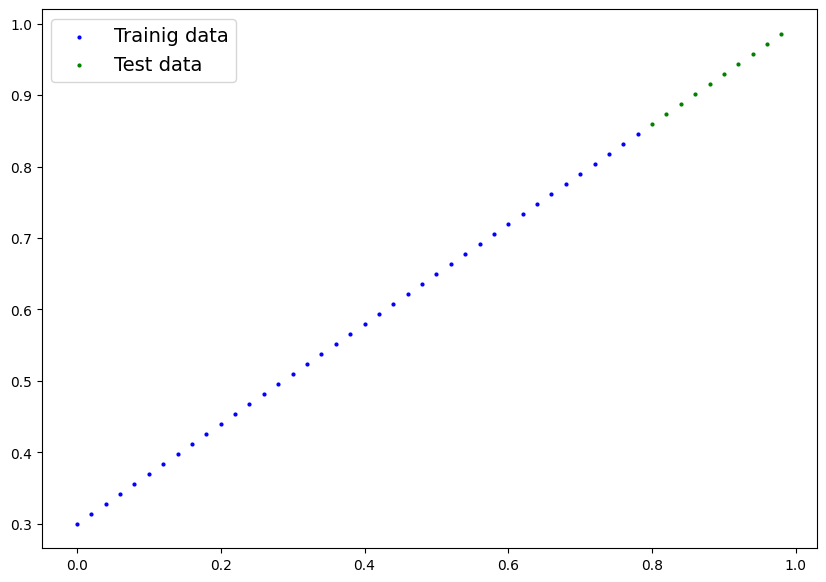

In [9]:
plot_predictions();

## 2. Build Model

Our first PyTorch model!

https://realpython.com/python-classes/

What our model does

* start with rndom values(weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values(the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:

1. Gradient Descent
2. Back propagation


In [10]:
# Create Linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module):   # <- almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # ,<- start with a random weight and try to adjust it to ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # ,- PyTroch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to deefine the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn -> contains all of the buildings for computational graphs(a neural network can be considered as a computational graphs)

* torch.nn.parameter - what parameters should our model try and learn , often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules,if you subclass it, you should overwrite forward()

* torch.optim - this is where the optimizer in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


### Checking the contents of our pytorch model

using .parameters to see whats inside out model

* PyTorch essential neural network building modules
* torch.nn
* torch.nn.Module
* torch.optim
* torch.utils.data.Dataset
* torch.utils.data.DataLoder

In [11]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model(this is a subclass of nn.module)
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
weight, bias

(0.7, 0.3)

### Making preediction using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'

In [14]:
# when we pass data through our model, it's going to run it through the forward() method
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

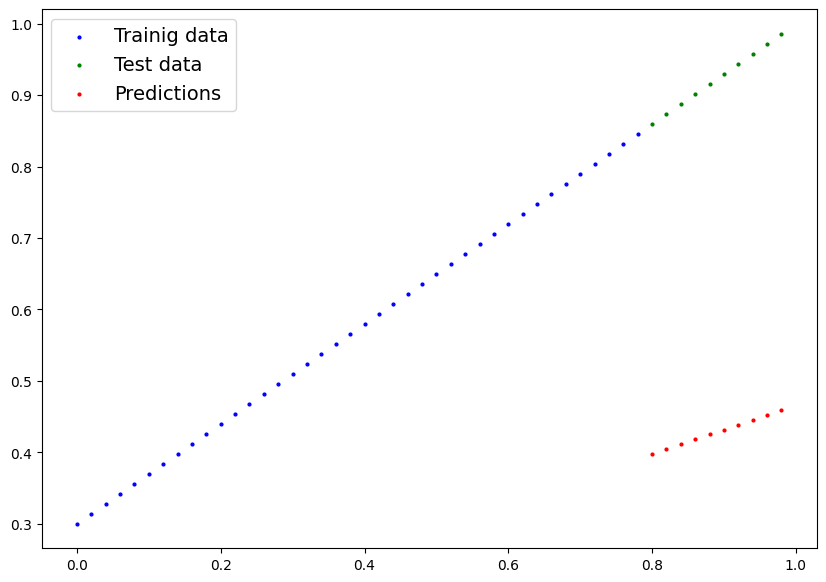

In [15]:
plot_predictions(predictions=y_preds)

In [16]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [17]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [18]:
with torch.inference_mode():
  y_preds = model_0(X_test)
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

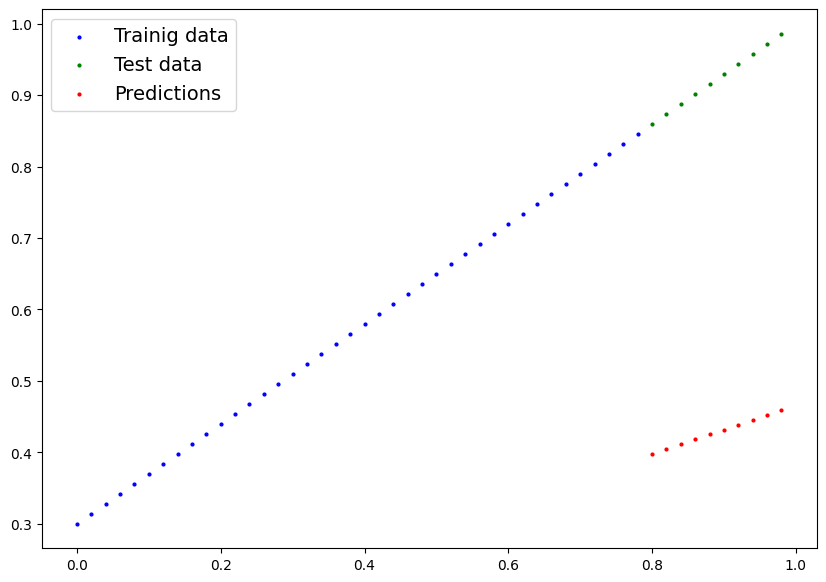

In [19]:
plot_predictions(predictions=y_preds)

### 3. Train Model

The whole idea of training is for a model to move from some *unkown* parameters (these may be random) to some *known* parameters.

Or in other words a from a poor representtion of data to a better representation of a data.

One way to measure how poor or how wrong your models prediction s are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

* **Loss function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.


In [20]:
list[model_0.parameters()]

list[<generator object Module.parameters at 0x78dd9bb83d80>]

In [23]:
# check out our model's parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [25]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer(Stochastic Gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) #lr = learning rate = pssibly the most importany parameter you can set.

Q: Which loss function and optimizer should i use?

A: This will be a problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem(like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCElOSS() (bINARY CROSS entropy loss).

### Building a training loop( and a testing loop ) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (This involves data moving through our model's 'forward()' functions) to make predictions on data - also called forward propagation
2. calculate the loss( compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. Loss backward - move backwards through the network to calcualte the gradients of each o the parameters of our moel with respect to the loss
5. optimizer step - use the optimizer to adjust our models parameters to try and improve the loss(**Gradient descent**)

In [28]:
model_0.eval()
with torch.inference_mode():
  list(model_0.parameters())

In [27]:
model_0.parameters()

<generator object Module.parameters at 0x78de7f5e5e00>

In [31]:
# An epoch is one loop through the data....
epochs = 1

# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require graadients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step() # By default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 fro the next iteration of the loop

# model_0.eval() # turn off gradient tracking
model_0.eval()


LinearRegressionModel()

In [ ]:
model_0.state